## Regression (Classic Dataset = Boston House Price)

Problem: Build a model to predict the price of a home in the city of Boston, USA. To train our predictive model, we will use the Boston House Price dataset from the UCI repository.

Dataset Attributes:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000
11. PTRATIO: pupil-teacher ratio by town
12. Bk: proportion of blacks by town
13. LSTAT: lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000s

## Packages

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
#from xgboost import XGBClassifier
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Loading

In [7]:
file = "boston-houses.csv"
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv(file, delim_whitespace = True, names = columns)

## Summarizing

In [8]:
# Shape
print(data.shape)

(506, 14)


In [9]:
# Types
print(data.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [10]:
# Head 
print(data.head(10))


      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396

In [11]:
# Describe
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [12]:
# Correlation
print(data.corr(method = 'pearson'))

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

## Visualization¶

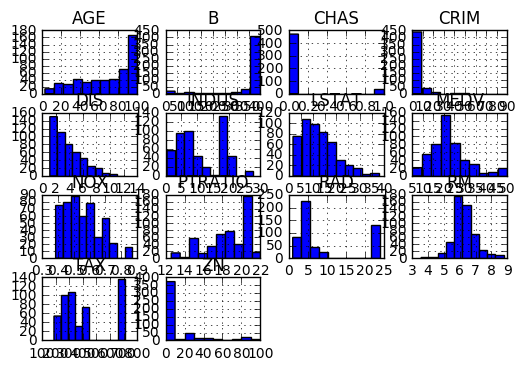

In [14]:
data.hist()
plt.show()

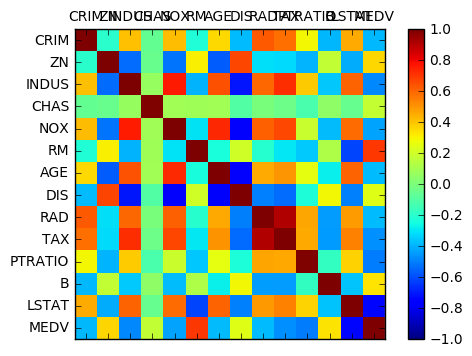

In [15]:
# Correlation Matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin = -1, vmax = 1, interpolation = 'none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
plt.show()

## Data Preparation

In [17]:
# Separation in Training and Test Data
data_values = data.values

# Independent variables
X = data_values[:,0:13]

#Dependent variable
Y = data_values[:,13]

# Training and Test Data Sets
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, 
                                                                         test_size = 0.20, 
                                                                         random_state = 7)

## Algorithm Evaluation

In [21]:
pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Scaled-LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('Scaled-EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('Scaled-SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []

for name, model in pipelines:
    kfold = cross_validation.KFold(n = len(X_train), n_folds = 10, random_state = 7)
    cross_val_result = cross_validation.cross_val_score(model, 
                                                        X_train, 
                                                        Y_train, 
                                                        cv = kfold, 
                                                        scoring = 'neg_mean_squared_error')
    results.append(cross_val_result)
    names.append(name)
    text = "%s: %f (%f)" % (name, cross_val_result.mean(), cross_val_result.std())
    print(text)

Scaled-LR: -21.379856 (9.414264)
Scaled-LASSO: -26.607314 (8.978761)
Scaled-EN: -27.932372 (10.587490)
Scaled-KNN: -20.107620 (12.376949)
Scaled-CART: -24.428221 (12.169059)
Scaled-SVR: -29.633086 (17.009186)


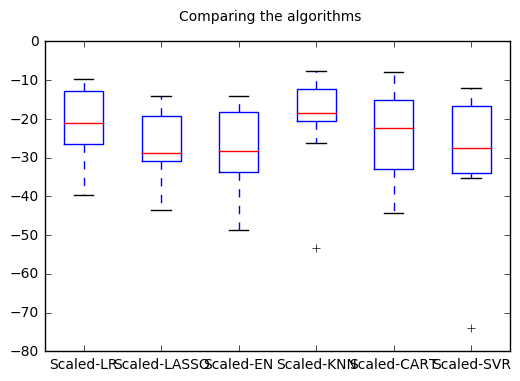

In [22]:
fig = plt.figure()
fig.suptitle('Comparing the algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Tuning  KNN (best result)

In [23]:
# Scale
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

#k
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
val_grid = dict(n_neighbors = k_values)

#model
model = KNeighborsRegressor()

#K
kfold = cross_validation.KFold(n = len(X_train), n_folds = 10, random_state = 7)

# Tunning
grid = GridSearchCV(estimator = model, param_grid = val_grid, scoring = 'neg_mean_squared_error', cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best MSE: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best MSE: -18.172137 using {'n_neighbors': 3}
-20.169640 (14.986904) with: {'n_neighbors': 1}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.320892 (11.849667) with: {'n_neighbors': 21}


## Ensemble methods

In [26]:
ensembles = []
ensembles.append(('Scaled-AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('Scaled-GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('Scaled-ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []

for name, model in ensembles:
    kfold = cross_validation.KFold(n = len(X_train), n_folds = 10, random_state = 7)
    cross_val_result = cross_validation.cross_val_score(model, 
                                                        X_train, 
                                                        Y_train, 
                                                        cv = kfold, scoring = 'neg_mean_squared_error')
    results.append(cross_val_result)
    names.append(name)
    text = "%s: %f (%f)" % (name, cross_val_result.mean(), cross_val_result.std())
    print(text)

Scaled-AB: -14.376781 (5.858740)
Scaled-GBM: -9.903670 (4.282689)
Scaled-RF: -12.545088 (5.861949)
Scaled-ET: -10.657163 (5.749850)


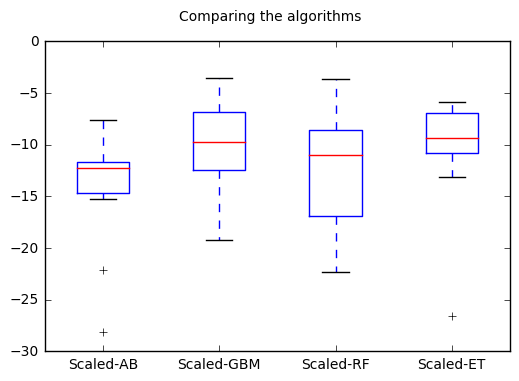

In [27]:
fig = plt.figure()
fig.suptitle('Comparing the algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Tuning  GBM (Gradient Boosting Method)

In [28]:
# Scale
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Number of estimators (trees).
val_grid = dict(n_estimators = np.array([50,100,150,200,250,300,350,400]))

# Model
model = GradientBoostingRegressor(random_state = 7)

# K
kfold = cross_validation.KFold(n = len(X_train), n_folds = 10, random_state = 7)

# Tunning
grid = GridSearchCV(estimator = model, param_grid = val_grid, cv = kfold, scoring = 'neg_mean_squared_error')
grid_result = grid.fit(rescaledX, Y_train)


print("Best MSE: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best MSE: -9.356471 using {'n_estimators': 400}
-10.794196 (4.711473) with: {'n_estimators': 50}
-10.023378 (4.430026) with: {'n_estimators': 100}
-9.677657 (4.264829) with: {'n_estimators': 150}
-9.523680 (4.259064) with: {'n_estimators': 200}
-9.432755 (4.250884) with: {'n_estimators': 250}
-9.414258 (4.262219) with: {'n_estimators': 300}
-9.353381 (4.242264) with: {'n_estimators': 350}
-9.339880 (4.255717) with: {'n_estimators': 400}


## Finishing the Predictive Model

In [29]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state = 7, n_estimators = 400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=7,
             subsample=1.0, verbose=0, warm_start=False)

In [30]:
# Applying the template to test data
rescaledValidationX = scaler.transform(X_test)
prediction = model.predict(rescaledValidationX)

print(mean_squared_error(Y_test, prediction))

11.875252079219903


# End